In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import esmtools as et
from esmtools import stats

import shapefile
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gp
import regionmask
import matplotlib.patches as mpatches
import xesmf as xe

In [2]:
co3_satarag = np.array([65.4, 76.7, 158.1])
depth = np.array([0,1000,6000])

0.015717741935483864
63.391935483870945


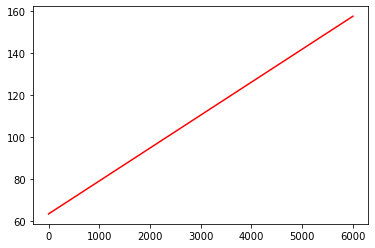

In [3]:
x, y = np.polyfit(depth,co3_satarag,1)
plt.plot(depth, x*depth + y, color='r') 
print(x)
print(y)

In [4]:
# Open dataset of potential temperature
dr = '/home/jovyan/SOARS_2021/Data/MRI-ESM2-0/'
fn = 'thetao_Omon_MRI-ESM2-0_omip2_r1i1p1f1_gr_195801-201812.nc'

data_thetao = xr.open_dataset(dr+fn)
data_thetao

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 61, lon: 360, time: 732)
Coordinates:
  * time       (time) datetime64[ns] 1958-01-16T12:00:00 ... 2018-12-16T12:00:00
  * lev        (lev) float64 1.0 3.5 6.5 10.0 ... 5.5e+03 6.15e+03 6.525e+03
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lev_bnds   (lev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    thetao     (time, lev, lat, lon) float32 ...
Attributes: (12/36)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           OMIP
    branch_method:         no parent
    creation_date:         2020-03-26T15:20:29Z
    data_specs_version:    01.00.31
    experiment:            OMIP experiment forced by JRA55-do atmospheric dat...
    ...                    ...
    title:                 MRI-ESM2-0 output prepared for CMIP6
    variable_id:           thetao
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by MRI is licensed under...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/34bd754e-ec3c-4c8b-9acc-add54b9b79ac

In [5]:
data_thetao = data_thetao.sel(lev=slice(0,500))

In [6]:
depth = data_thetao['lev']
depth

<xarray.DataArray 'lev' (lev: 34)>
array([  1. ,   3.5,   6.5,  10. ,  15. ,  22. ,  30.5,  40. ,  50. ,  60. ,
        70. ,  80. ,  90. , 100. , 110. , 120. , 130. , 140. , 150. , 160. ,
       170. , 180. , 190. , 200. , 212.5, 230. , 250. , 272.5, 300. , 330. ,
       362.5, 400. , 440. , 485. ])
Coordinates:
  * lev      (lev) float64 1.0 3.5 6.5 10.0 15.0 ... 362.5 400.0 440.0 485.0
Attributes:
    bounds:         lev_bnds
    units:          m
    axis:           Z
    positive:       down
    long_name:      ocean depth coordinate
    standard_name:  depth

In [7]:
depth_int = depth.astype(np.int)
depth_int

<ipython-input-7-a2db9250cd4b>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  depth_int = depth.astype(np.int)


<xarray.DataArray 'lev' (lev: 34)>
array([  1,   3,   6,  10,  15,  22,  30,  40,  50,  60,  70,  80,  90,
       100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 212, 230,
       250, 272, 300, 330, 362, 400, 440, 485])
Coordinates:
  * lev      (lev) float64 1.0 3.5 6.5 10.0 15.0 ... 362.5 400.0 440.0 485.0
Attributes:
    bounds:         lev_bnds
    units:          m
    axis:           Z
    positive:       down
    long_name:      ocean depth coordinate
    standard_name:  depth

In [8]:
mean_depth = np.array([2, 4.5, 8, 12.5, 18.5, 26, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145,
                       155, 165, 175, 185, 195, 206, 221, 240, 261, 286, 315, 346, 381, 420, 462.5])

In [9]:
# units are in millimols per cubic meter
co3_satarag = (mean_depth*0.015717741935483864)+63.391935483870945
co3_satarag

array([63.42337097, 63.46266532, 63.51767742, 63.58840726, 63.68271371,
       63.80059677, 63.94205645, 64.09923387, 64.25641129, 64.41358871,
       64.57076613, 64.72794355, 64.88512097, 65.04229839, 65.19947581,
       65.35665323, 65.51383065, 65.67100806, 65.82818548, 65.9853629 ,
       66.14254032, 66.29971774, 66.45689516, 66.62979032, 66.86555645,
       67.16419355, 67.49426613, 67.88720968, 68.34302419, 68.83027419,
       69.38039516, 69.9933871 , 70.66139113])